In [4]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt # type: ignore

In [11]:
def energy_peak(variance, norm, char_energy, energy):
    return (norm/(np.sqrt(np.pi*2)*variance))*np.exp(-(energy-char_energy)**2/(2*variance**2))

def single_escape_peak(variance, norm, char_energy, energy):
    return (norm/(np.sqrt(np.pi*2)*variance))*np.exp(-(char_energy-(energy-.511))**2/(2*variance**2))

def double_escape_peak(variance, norm, char_energy, energy):
    return (norm/(np.sqrt(np.pi*2)*variance))*np.exp(-(char_energy-(energy-1.022))**2/(2*variance**2))

def exponential_tail_low(norm4, variance1, variance4, char_energy, energy):
    return norm4 * np.exp((char_energy-energy)/(np.sqrt(np.pi*2)*variance1*variance4))*special.erfc(((char_energy-energy)/(np.sqrt(2)*variance1))+(1/(2*variance4)))

def flat_continuum(norm, variance1, char_energy, energy):
    return norm * special.erfc((char_energy-energy)/(np.sqrt(2)*variance1))

def single_scatter_compton_continuum(norm, variance5, variance, char_energy, energy):
    energy_prime = energy - char_energy
    energy_c = energy/(1+(511/(2*energy)))
    theta = np.arccos(1+(511/(2*energy))+ (511/(2*energy_prime)))
    if char_energy <= energy_c:
        return norm*((energy/energy_prime)+(energy_prime/energy)-1+(np.cos(theta))**2)*special.erfc((char_energy-variance5)/(np.sqrt(2)*variance))
    else:
        return 0

C:\Users\gilde\AppData\Local\Temp\ipykernel_2492\265696551.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  energy_c = energy/(1+(511/(2*energy)))
C:\Users\gilde\AppData\Local\Temp\ipykernel_2492\265696551.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arccos(1+(511/(2*energy))+ (511/(2*energy_prime)))
C:\Users\gilde\AppData\Local\Temp\ipykernel_2492\265696551.py:19: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(1+(511/(2*energy))+ (511/(2*energy_prime)))


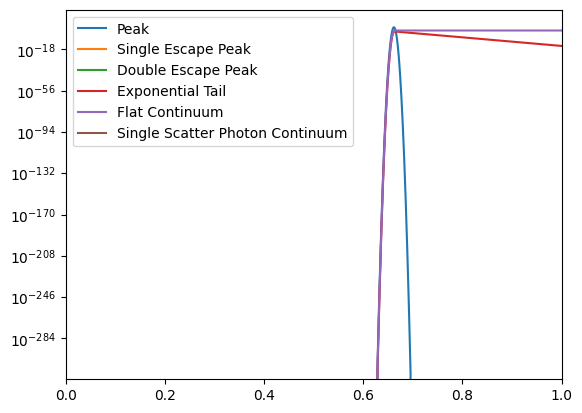

In [12]:
energy = .662
norm1 = -0.937680 + 0.203032e1 * energy**(-0.2) - 0.892372 * energy**(0.4)
norm2 = -0.102569e-1 +0.107664 * np.sqrt(energy) -0.205109e-1 * energy
norm3 = -0.635789e-1 + 0.688801e-1 * np.sqrt(energy) - 0.141398e-1 * energy
norm4 = 0.154572e-1 +0.390365e-2 * energy 
norm5 = 0.110826e-1 +0.911437e-1 / np.sqrt(energy)
norm6 = 0.721355e-2 + 0.185895 / (energy**2)
variance1 = 0.624674e-3 + 0.380308e-3 * energy
variance2 = 0.649538e-3 + 0.414838e-3 * energy
variance3 = 0.188524e-3 + 0.455144e-3 * energy
variance4 = 5.0
variance5 = -0.156849 + 0.965065 * energy
variance6 = 0.443463e-1 + .169773e-1 * energy
x = np.linspace(0,3,8192)
peak = []
sep = []
dep = []
exp_tail = []
flat_cont = []
sscc = []
for value in x:
    peak.append(energy_peak(variance1, norm1, energy, value))
    sep.append(single_escape_peak(variance2, norm2, energy, value))
    dep.append(double_escape_peak(variance3, norm3, energy, value))
    exp_tail.append(exponential_tail_low(norm4, variance1, variance4, energy, value))
    flat_cont.append(flat_continuum(norm5, variance1, energy, value))
    sscc.append(single_scatter_compton_continuum(norm6, variance5, variance6, energy, value))
fig, ax = plt.subplots()
ax.plot(x,peak, label = 'Peak')
ax.plot(x,sep, label = 'Single Escape Peak')
ax.plot(x,dep, label = 'Double Escape Peak')
ax.plot(x,exp_tail, label = 'Exponential Tail')
ax.plot(x,flat_cont, label = 'Flat Continuum')
ax.plot(x,sscc, label = 'Single Scatter Photon Continuum')
ax.set_yscale('log')
ax.set_xlim(0, 1)
ax.legend()